# Importar Librerías

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

## Funciones

In [7]:
def get_neighbors(i, j, M, N):
    """
    Obtiene los vecinos de una celda en una cuadrícula 2D.

    Esta función devuelve las coordenadas de los vecinos de una celda (i, j) en una cuadrícula de tamaño M x N.
    Se consideran los 8 vecinos adyacentes (vecindad de Moore), excluyendo la celda misma.

    Parámetros:
    -----------
    i : int
        Índice de fila de la celda.
    j : int
        Índice de columna de la celda.
    M : int
        Número total de filas en la cuadrícula.
    N : int
        Número total de columnas en la cuadrícula.

    Retorna:
    --------
    neighbors : list of tuple
        Lista de tuplas (ni, nj) que representan las coordenadas de los vecinos de la celda (i, j).
        Solo se incluyen los vecinos que están dentro de los límites de la cuadrícula.
    """
    neighbors = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            if di == 0 and dj == 0:
                continue
            ni, nj = i + di, j + dj
            if 0 <= ni < M and 0 <= nj < N:
                neighbors.append((ni, nj))
    return neighbors

In [8]:
def simulate_diffusion(M, N, T, u0, K):
    """
    Simula el proceso de difusión en una cuadrícula 2D.

    Esta función simula la difusión de una sustancia en una cuadrícula de tamaño M x N durante T pasos de tiempo.
    La difusión se realiza utilizando una vecindad de 8 vecinos (vecindad de Moore) y un parámetro de difusión K.

    Parámetros:
    -----------
    M : int
        Número de filas en la cuadrícula.
    N : int
        Número de columnas en la cuadrícula.
    T : int
        Número de pasos de tiempo para la simulación.
    u0 : array-like of float
        Distribución inicial de la sustancia en la cuadrícula. Debe ser un array de tamaño M x N con entradas no-negativas que sumen 1.
    K : float
        Parámetro de velocidad de difusión, 0 ≤ K ≤ 1.

    Retorna:
    --------
    history : list of numpy.ndarray
        Lista de arrays que representan el estado de la cuadrícula en cada paso de tiempo. Cada array es de tamaño M x N.
    """
    u = np.array(u0)
    history = [u.copy()]
    
    for t in range(T):
        u_new = u.copy()
        for i in range(M):
            for j in range(N):
                neighbors = get_neighbors(i, j, M, N)
                diffusion_sum = sum(u[ni, nj] for ni, nj in neighbors)
                u_new[i, j] = (1 - K) * u[i, j] + (K / 8) * diffusion_sum
        u = u_new
        history.append(u.copy())
    
    return history

In [9]:
def plot_diffusion(history, save_path=None):
    """
    Genera y muestra una animación de la difusión en una cuadrícula 2D.

    Esta función crea una animación de la evolución de la difusión en una cuadrícula 2D a lo largo del tiempo.
    La animación se puede mostrar en pantalla o guardar en un archivo de video.

    Parámetros:
    -----------
    history : list of numpy.ndarray
        Lista de arrays que representan el estado de la cuadrícula en cada paso de tiempo. Cada array es de tamaño M x N.
    save_path : str, opcional
        Ruta del archivo donde se guardará la animación en formato de video. Si no se proporciona, la animación se mostrará en pantalla.

    Retorna:
    --------
    None
    """
    fig, ax = plt.subplots()
    cax = ax.matshow(history[0], cmap='viridis')
    fig.colorbar(cax)

    def update(frame):
        cax.set_array(history[frame])
        return cax,

    ani = FuncAnimation(fig, update, frames=len(history), blit=True)
    
    if save_path:
        writer = FFMpegWriter(fps=10, metadata=dict(artist='Me'), bitrate=1800)
        ani.save(save_path, writer=writer)
    else:
        plt.show()

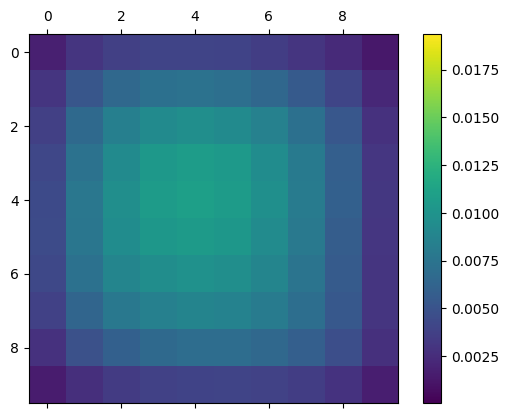

In [10]:
# Example usage
M, N = 10, 10
T = 50
u0 = np.random.rand(M, N)
u0 /= u0.sum()  # Normalize to sum to 1
K = 0.1

history = simulate_diffusion(M, N, T, u0, K)
plot_diffusion(history, save_path='diffusion_simulation.mp4')